<a href="https://colab.research.google.com/github/Nharnharqwaci/Foxtrot-2-Final-project-/blob/main/st_Foxtrot_2_Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE NEEDED LIBRARIES FOR DATA MANIPULATION, ANALYSIS AND VISUALIZATION



In [64]:
# Import necessary libraries for data manipulation, analysis, visualization, and machine learning.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import joblib
import os

LOADING THE DATASET AND PERFORMING BASIC EXPLORATORY DATA ANALYSIS(EDA)

This includes viewing the first few rows, last few rows, summary statistics,
checking the shape of the dataset, and identifying missing values.

In [65]:
# Load the dataset and display basic information.
fraud_data = pd.read_csv('/content/Bank_Transaction_Fraud_Detection.csv')
print("Dataset loaded successfully.")
print("Shape of the dataset:", fraud_data.shape)
print("\nFirst 5 rows of the dataset:")
display(fraud_data.head())
print("\nLast 5 rows of the dataset:")
display(fraud_data.tail())
print("\nSummary statistics:")
display(fraud_data.describe())
print("\nMissing values per column:")
print(fraud_data.isnull().sum())

Dataset loaded successfully.
Shape of the dataset: (200000, 24)

First 5 rows of the dataset:


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com



Last 5 rows of the dataset:


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com
199999,f3dd92ef-b17a-45d2-b6cb-fdbee20843fe,Gopal Rout,Male,34,Nagaland,Kohima,Kohima Branch,Business,b44b6e8a-1036-4ec1-b492-5e7ffc7baf6d,08-01-2025,...,Electronics,15066.24,Virtual Card,"Kohima, Nagaland",Mobile,0,INR,+9193961XXXXXX,Installment payment,gopalXXXXX@XXXXXXX.com



Summary statistics:


,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000



Missing values per column:
Customer_ID                0
Customer_Name              0
Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_ID             0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Merchant_ID                0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Customer_Contact           0
Transaction_Description    0
Customer_Email             0
dtype: int64


Displaying the first few rows of the DataFrame to get an initial look at the data structure.

In [3]:
fraud_data.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


Displaying the last few rows of the DataFrame.

In [4]:
fraud_data.tail()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
199995,b8bdae19-296f-48b7-9104-e055d33a09ac,Vedhika Magar,Female,55,Dadra and Nagar Haveli and Daman and Diu,Diu,Diu Branch,Business,8d856bc7-4666-4509-a067-48d67500694a,08-01-2025,...,Restaurant,37475.11,Desktop/Laptop,"Diu, Dadra and Nagar Haveli and Daman and Diu",ATM,0,INR,+9192629XXXXXX,ATM withdrawal,vedhikaXXXXX@XXXXXXX.com
199996,635bc099-8a93-48ee-829a-bf2283fe8fda,Aashi Pai,Male,51,Manipur,Kangpokpi,Kangpokpi Branch,Business,f2890dbd-4e01-445d-97f5-ac56886e9037,01-01-2025,...,Groceries,53037.20,ATM,"Kangpokpi, Manipur",ATM,0,INR,+9198116XXXXXX,Subscription box,aashiXXX@XXXXXX.com
199997,c1b31cc2-0905-47e8-8cc5-6461d1f3ba33,Dayita Shan,Female,41,Chandigarh,Chandigarh,Chandigarh Branch,Savings,f714b758-7539-474d-b676-5fa7e2480141,28-01-2025,...,Health,96225.36,ATM,"Chandigarh, Chandigarh",Desktop,0,INR,+9192601XXXXXX,Charity donation,dayitaXXXX@XXXXXXX.com
199998,32bb8e66-f3fa-43bf-8242-dab9a6116310,Unnati Vyas,Female,28,Telangana,Nizamabad,Nizamabad Branch,Checking,f6903b6a-b582-47ea-95d5-aff16bdec950,08-01-2025,...,Electronics,89599.90,Voice Assistant,"Nizamabad, Telangana",Desktop,0,INR,+9197537XXXXXX,Tourist attraction payment,unnatiXXX@XXXXX.com
199999,f3dd92ef-b17a-45d2-b6cb-fdbee20843fe,Gopal Rout,Male,34,Nagaland,Kohima,Kohima Branch,Business,b44b6e8a-1036-4ec1-b492-5e7ffc7baf6d,08-01-2025,...,Electronics,15066.24,Virtual Card,"Kohima, Nagaland",Mobile,0,INR,+9193961XXXXXX,Installment payment,gopalXXXXX@XXXXXXX.com


In [5]:
fraud_data.describe()

,Age,Transaction_Amount,Account_Balance,Is_Fraud
count,200000.000000,200000.000000,200000.000000,200000.000000
mean,44.015110,49538.015554,52437.988784,0.050440
std,15.288774,28551.874004,27399.507128,0.218852
min,18.000000,10.290000,5000.820000,0.000000
25%,31.000000,24851.345000,28742.395000,0.000000
50%,44.000000,49502.440000,52372.555000,0.000000
75%,57.000000,74314.625000,76147.670000,0.000000
max,70.000000,98999.980000,99999.950000,1.000000


Calculating the number of missing values for each column.

In [7]:
fraud_data.isnull().sum()

,0
Customer_ID,0
Customer_Name,0
Gender,0
Age,0
State,0
City,0
Bank_Branch,0
Account_Type,0
Transaction_ID,0
Transaction_Date,0


PRINTING THE VALUE COUNT FOR THE IS_FRAUD COLUMN TO CHECK THE DISTRIBUTION OF CLASSES.

In [66]:
# Display the value count for the target variable 'Is_Fraud' to check class distribution.
print(fraud_data['Is_Fraud'].value_counts())

Is_Fraud
0    189912
1     10088
Name: count, dtype: int64


NOW WE HANDLE THE IMBALANCE IN THE DATA FROM THE IS_FRAUD COLUMN

In [67]:
# Handle data imbalance by separating majority and minority classes.
class_0 = fraud_data[fraud_data['Is_Fraud'] == 0]
class_1 = fraud_data[fraud_data['Is_Fraud'] == 1]

In [68]:
# Undersample the majority class to match the size of the minority class.
class_0_undersampled = class_0.sample(n=len(class_1), random_state=42)

In [69]:
# Concatenate the undersampled majority class with the minority class to create a balanced dataset.
undersampled_data = pd.concat([class_0_undersampled, class_1], axis=0)

Visualizing the distribution of 'Is_Fraud' before and after undersampling

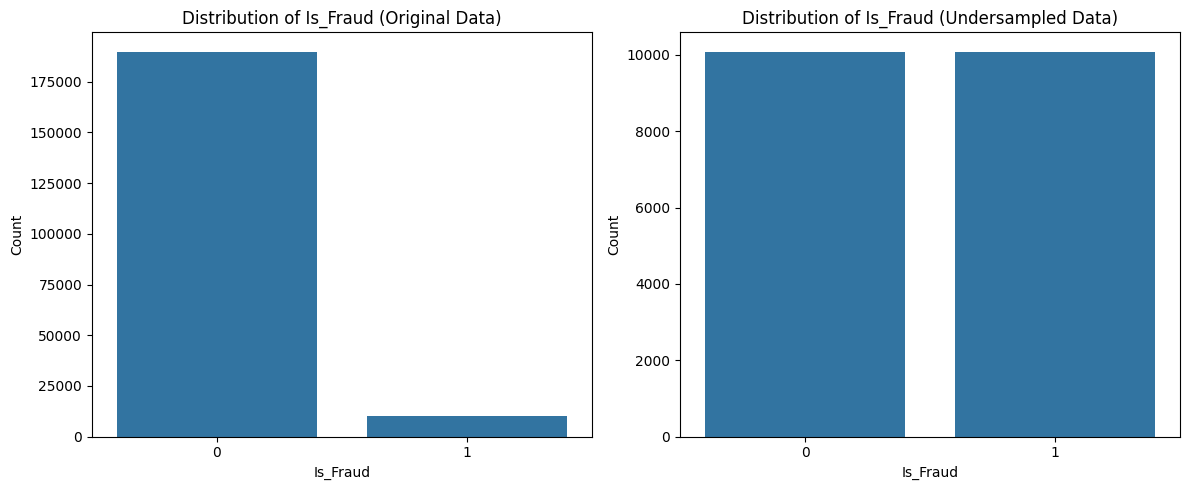

In [70]:
# Visualize the class distribution before and after undersampling.
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='Is_Fraud', data=fraud_data)
plt.title('Distribution of Is_Fraud (Original Data)')
plt.xlabel('Is_Fraud')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='Is_Fraud', data=undersampled_data)
plt.title('Distribution of Is_Fraud (Undersampled Data)')
plt.xlabel('Is_Fraud')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

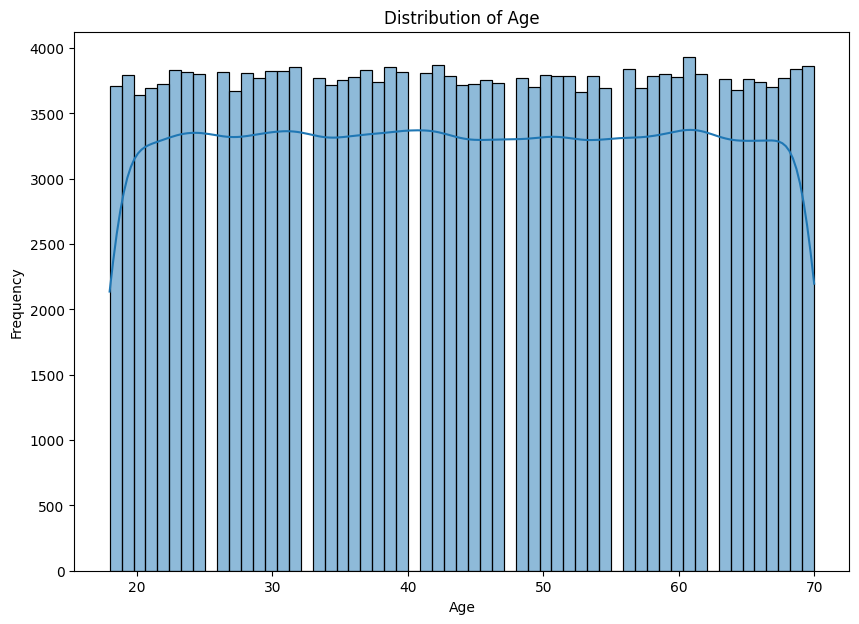

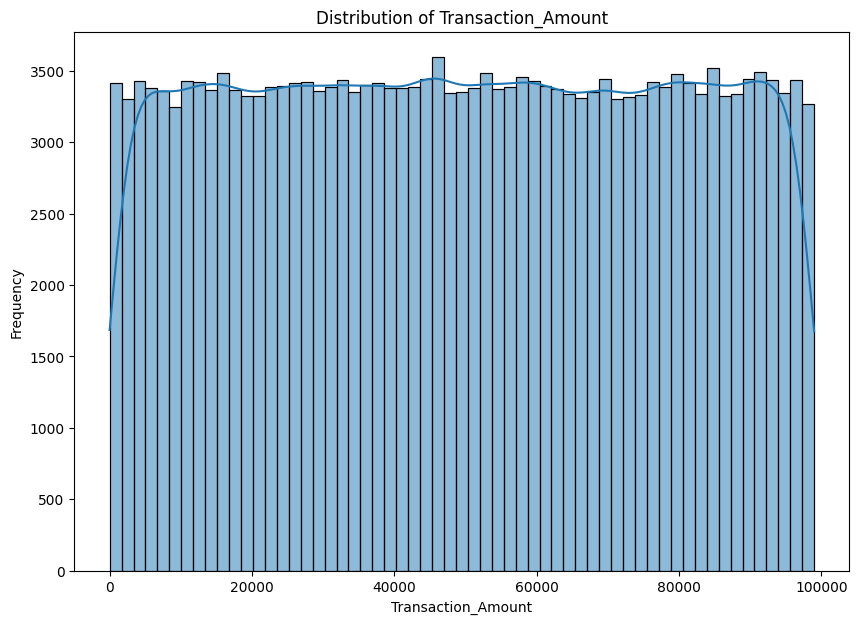

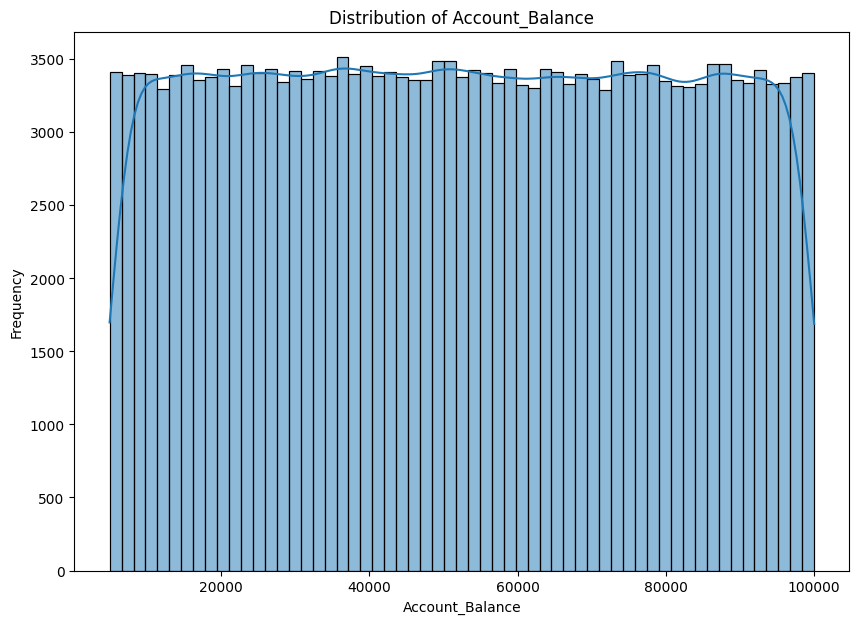

In [71]:
# Visualize the distribution of numerical features.
numerical_features = fraud_data.select_dtypes(include=np.number).columns.tolist()
numerical_features.remove('Is_Fraud')

for col in numerical_features:
    plt.figure(figsize=(10, 7))
    sns.histplot(data=fraud_data, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [72]:
# Display the value count for the target variable in the undersampled dataset.
print(undersampled_data['Is_Fraud'].value_counts())

Is_Fraud
0    10088
1    10088
Name: count, dtype: int64


SPLITTING THE DATASET INTO TRAINING SET AND TESTING SET

In [73]:
# Split the undersampled data into training and testing sets.
X = undersampled_data.drop('Is_Fraud', axis=1)
y = undersampled_data['Is_Fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (16140, 23)
Shape of X_test: (4036, 23)
Shape of y_train: (16140,)
Shape of y_test: (4036,)


Feature Engineering.

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [74]:
# Define preprocessing steps for numerical and categorical features and create a Random Forest pipeline.
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Define hyperparameters for tuning the Random Forest model.
param_grid = {
    'classifier__n_estimators': [100, 200],
 'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

# Perform GridSearchCV to find the best Random Forest model hyperparameters.
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

# Make predictions on the test set using the best Random Forest model.
y_pred = grid_search.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      2018
           1       0.50      0.48      0.49      2018

    accuracy                           0.50      4036
   macro avg       0.50      0.50      0.50      4036
weighted avg       0.50      0.50      0.50      4036

Confusion Matrix:
 [[1043  975]
 [1050  968]]


Evaluating the model performance.

In [75]:
# Print the best parameters, classification report, and confusion matrix for the Random Forest model.
print("Best parameters:", grid_search.best_params_)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Best parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.52      0.51      2018
           1       0.50      0.48      0.49      2018

    accuracy                           0.50      4036
   macro avg       0.50      0.50      0.50      4036
weighted avg       0.50      0.50      0.50      4036

Confusion Matrix:
 [[1043  975]
 [1050  968]]


Visualizing the Confusion Matrix

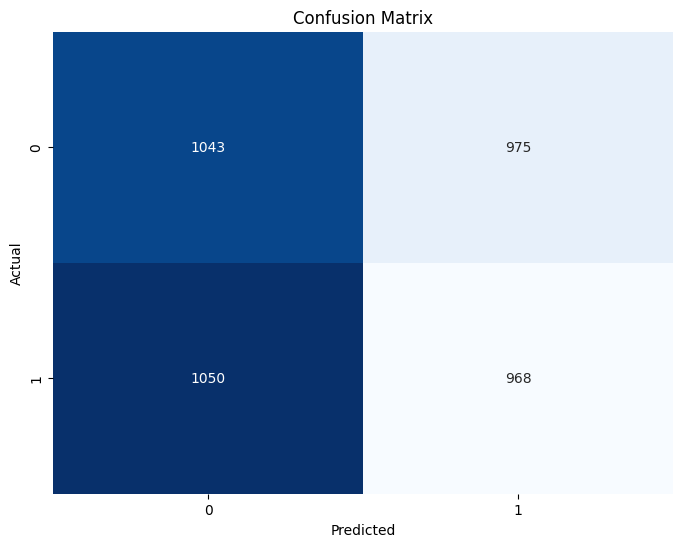

In [76]:
# Visualize the confusion matrix for the Random Forest model.
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Summarizing the findings.

In [77]:
# Summarize the performance of the Random Forest model.
report = classification_report(y_test, y_pred, output_dict=True)

print("Summary of Model Performance:")
print("The model achieved an accuracy of:", report['accuracy'])
print("The precision for class 1 (fraud) is:", report['1']['precision'])
print("The recall for class 1 (fraud) is:", report['1']['recall'])
print("The F1-score for class 1 (fraud) is:", report['1']['f1-score'])

print("\nInterpretation of Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print("True Positives (Correctly predicted fraud):", cm[1, 1])
print("True Negatives (Correctly predicted not fraud):", cm[0, 0])
print("False Positives (Incorrectly predicted fraud):", cm[0, 1])
print("False Negatives (Incorrectly predicted not fraud):", cm[1, 0])

Summary of Model Performance:
The model achieved an accuracy of: 0.49826560951437066
The precision for class 1 (fraud) is: 0.4981986618630983
The recall for class 1 (fraud) is: 0.4796828543111992
The F1-score for class 1 (fraud) is: 0.48876546326685183

Interpretation of Confusion Matrix:
True Positives (Correctly predicted fraud): 968
True Negatives (Correctly predicted not fraud): 1043
False Positives (Incorrectly predicted fraud): 975
False Negatives (Incorrectly predicted not fraud): 1050




Training an Isolation Forest model on the data and tuning its hyperparameters.

In [78]:
# Train and tune an Isolation Forest model for anomaly detection on numerical features.
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import numpy as np

numerical_cols = undersampled_data.select_dtypes(include=np.number).columns.tolist()
# Remove 'Is_Fraud' as it's the target variable
if 'Is_Fraud' in numerical_cols:
    numerical_cols.remove('Is_Fraud')

X_numerical = undersampled_data[numerical_cols]

# Scale the numerical data before applying Isolation Forest
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Define the Isolation Forest model
iso_forest = IsolationForest(random_state=42)

# Define the parameter grid for tuning
param_grid_iso = {
    'n_estimators': [100, 200],
    'contamination': ['auto', 0.01, 0.05],
    'max_features': [1.0, 0.8]
}

# Set up GridSearchCV for Isolation Forest
grid_search_iso = GridSearchCV(iso_forest, param_grid_iso, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the scaled numerical data
grid_search_iso.fit(X_scaled)

print("Best parameters for Isolation Forest:", grid_search_iso.best_params_)

# Get the best Isolation Forest model
best_iso_forest = grid_search_iso.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:1108: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for Isolation Forest: {'contamination': 'auto', 'max_features': 1.0, 'n_estimators': 100}


 Analyze anomalies

Predict anomaly scores and identify anomalies using the trained Isolation Forest model.

In [79]:
# Predict anomaly scores and outlier labels using the trained Isolation Forest model.
anomaly_scores = best_iso_forest.decision_function(X_scaled)
predictions = best_iso_forest.predict(X_scaled)

# Add the anomaly scores and predictions to the undersampled_data DataFrame.
undersampled_data['anomaly_score'] = anomaly_scores
undersampled_data['is_outlier_iso_forest'] = predictions

print("DataFrame with anomaly scores and outlier predictions:")
display(undersampled_data.head())

print("\nValue counts for Isolation Forest outlier predictions:")
print(undersampled_data['is_outlier_iso_forest'].value_counts())

DataFrame with anomaly scores and outlier predictions:


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,anomaly_score,is_outlier_iso_forest
148697,640e3ba9-5da4-438f-ac18-4bed43c2615e,Darsh Pandey,Female,39,Madhya Pradesh,Ujjain,Ujjain Branch,Business,a113906c-f517-4089-a775-5990cd1d91fc,25-01-2025,...,Payment Gateway Device,"Ujjain, Madhya Pradesh",ATM,0,INR,+9191392XXXXXX,Online workshop,darshXXXXX@XXXXX.com,0.002287,1
164508,7ddb4a5f-ad4e-47cd-9d8b-3f274d86e9b9,Udant Chandra,Female,36,Manipur,Churachandpur,Churachandpur Branch,Checking,aa799df2-75c6-40a6-b90a-0e278df3e6a4,25-01-2025,...,Mobile Device,"Churachandpur, Manipur",Mobile,0,INR,+9193911XXXXXX,Customer service charge,udantXXX@XXXXX.com,-0.017830,-1
51044,88966c79-95b6-46e1-bd5d-820a304ef814,Jatin Manne,Female,27,Dadra and Nagar Haveli and Daman and Diu,Daman,Daman Branch,Checking,17cdb37d-ddd8-44df-b951-9f4ed10bdb2f,08-01-2025,...,ATM,"Daman, Dadra and Nagar Haveli and Daman and Diu",Desktop,0,INR,+9199833XXXXXX,Hotel reservation,jatinXXX@XXXXXX.com,-0.020644,-1
158237,07a6c5a8-5f48-4613-9dd2-69a6c45575dd,Varsha Dugal,Male,18,Punjab,Ludhiana,Ludhiana Branch,Savings,85c0b59b-f1f4-40cc-8ce5-9e18b3e362e4,30-01-2025,...,Desktop/Laptop,"Ludhiana, Punjab",Desktop,0,INR,+9193635XXXXXX,Gifts for family,varshaXXXXX@XXXXXX.com,-0.075614,-1
142853,41711590-5ebe-4cbd-a9fe-c47e0efffa10,Christopher Raj,Female,49,Goa,Vasco da Gama,Vasco da Gama Branch,Checking,3fd278d6-240e-4a7c-b9b3-c101e370dfba,23-01-2025,...,Web Browser,"Vasco da Gama, Goa",Desktop,0,INR,+9193317XXXXXX,Withdrawal,christopherXXXXX@XXXXXX.com,-0.012644,-1



Value counts for Isolation Forest outlier predictions:
is_outlier_iso_forest
-1    11986
 1     8190
Name: count, dtype: int64


Integrate model results

Add the anomaly scores or anomaly labels as new features to the original dataset or the undersampled dataset.

In [80]:
# Confirm that anomaly scores and outlier predictions have been added to the DataFrame.
print("Anomaly scores and outlier predictions have been added to 'undersampled_data'.")
display(undersampled_data.head())

Anomaly scores and outlier predictions have been added to 'undersampled_data'.


,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email,anomaly_score,is_outlier_iso_forest
148697,640e3ba9-5da4-438f-ac18-4bed43c2615e,Darsh Pandey,Female,39,Madhya Pradesh,Ujjain,Ujjain Branch,Business,a113906c-f517-4089-a775-5990cd1d91fc,25-01-2025,...,Payment Gateway Device,"Ujjain, Madhya Pradesh",ATM,0,INR,+9191392XXXXXX,Online workshop,darshXXXXX@XXXXX.com,0.002287,1
164508,7ddb4a5f-ad4e-47cd-9d8b-3f274d86e9b9,Udant Chandra,Female,36,Manipur,Churachandpur,Churachandpur Branch,Checking,aa799df2-75c6-40a6-b90a-0e278df3e6a4,25-01-2025,...,Mobile Device,"Churachandpur, Manipur",Mobile,0,INR,+9193911XXXXXX,Customer service charge,udantXXX@XXXXX.com,-0.017830,-1
51044,88966c79-95b6-46e1-bd5d-820a304ef814,Jatin Manne,Female,27,Dadra and Nagar Haveli and Daman and Diu,Daman,Daman Branch,Checking,17cdb37d-ddd8-44df-b951-9f4ed10bdb2f,08-01-2025,...,ATM,"Daman, Dadra and Nagar Haveli and Daman and Diu",Desktop,0,INR,+9199833XXXXXX,Hotel reservation,jatinXXX@XXXXXX.com,-0.020644,-1
158237,07a6c5a8-5f48-4613-9dd2-69a6c45575dd,Varsha Dugal,Male,18,Punjab,Ludhiana,Ludhiana Branch,Savings,85c0b59b-f1f4-40cc-8ce5-9e18b3e362e4,30-01-2025,...,Desktop/Laptop,"Ludhiana, Punjab",Desktop,0,INR,+9193635XXXXXX,Gifts for family,varshaXXXXX@XXXXXX.com,-0.075614,-1
142853,41711590-5ebe-4cbd-a9fe-c47e0efffa10,Christopher Raj,Female,49,Goa,Vasco da Gama,Vasco da Gama Branch,Checking,3fd278d6-240e-4a7c-b9b3-c101e370dfba,23-01-2025,...,Web Browser,"Vasco da Gama, Goa",Desktop,0,INR,+9193317XXXXXX,Withdrawal,christopherXXXXX@XXXXXX.com,-0.012644,-1


 Export final hybrid dataset

Save the dataset with the integrated anomaly information to a new CSV file.

In [81]:
# Export the hybrid dataset with integrated anomaly information to a CSV file.
output_csv_path = "/content/undersampled_fraud_data_with_anomalies.csv"
undersampled_data.to_csv(output_csv_path, index=False)

print(f"Hybrid dataset saved to: {output_csv_path}")

Hybrid dataset saved to: /content/undersampled_fraud_data_with_anomalies.csv


 Export models

Save the trained Random Forest and Isolation Forest models using joblib.

In [82]:
# Export the trained models (Random Forest and Isolation Forest) and preprocessing objects using joblib.
import joblib
import os

model_dir = "/content/trained_models"
os.makedirs(model_dir, exist_ok=True)

rf_model_path = os.path.join(model_dir, "best_random_forest_model.joblib")
iso_forest_model_path = os.path.join(model_dir, "best_isolation_forest_model.joblib")
preprocessor_path = os.path.join(model_dir, "preprocessor.joblib")
scaler_path = os.path.join(model_dir, "scaler.joblib")

joblib.dump(grid_search.best_estimator_, rf_model_path)
print(f"Best Random Forest model saved to: {rf_model_path}")

joblib.dump(best_iso_forest, iso_forest_model_path)
print(f"Best Isolation Forest model saved to: {iso_forest_model_path}")

joblib.dump(grid_search.best_estimator_.named_steps['preprocessor'], preprocessor_path)
print(f"Preprocessor saved to: {preprocessor_path}")

joblib.dump(scaler, scaler_path)
print(f"Isolation Forest scaler saved to: {scaler_path}")

Best Random Forest model saved to: /content/trained_models/best_random_forest_model.joblib
Best Isolation Forest model saved to: /content/trained_models/best_isolation_forest_model.joblib
Preprocessor saved to: /content/trained_models/preprocessor.joblib
Isolation Forest scaler saved to: /content/trained_models/scaler.joblib


In [83]:
# Load the hybrid dataset and train a new model as an example.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

hybrid_data_path = "/content/undersampled_fraud_data_with_anomalies.csv"

try:
    hybrid_data = pd.read_csv(hybrid_data_path)
    print(f"Hybrid dataset loaded successfully from: {hybrid_data_path}")
    print("Columns in hybrid dataset:", hybrid_data.columns.tolist())
except FileNotFoundError:
    print(f"Error: Hybrid dataset not found at {hybrid_data_path}")
    exit()

features_to_exclude = ['Is_Fraud', 'Customer_ID', 'Customer_Name', 'Transaction_ID', 'Customer_Contact', 'Customer_Email']
X_hybrid = hybrid_data.drop(columns=features_to_exclude)
y_hybrid = hybrid_data['Is_Fraud']

X_train_hybrid, X_test_hybrid, y_train_hybrid, y_test_hybrid = train_test_split(X_hybrid, y_hybrid, test_size=0.2, random_state=42, stratify=y_hybrid)

print("\nShape of X_train_hybrid:", X_train_hybrid.shape)
print("Shape of X_test_hybrid:", X_test_hybrid.shape)
print("Shape of y_train_hybrid:", y_train_hybrid.shape)
print("Shape of y_test_hybrid:", y_test_hybrid.shape)

hybrid_numerical_cols = X_train_hybrid.select_dtypes(include=np.number).columns.tolist()
hybrid_categorical_cols = X_train_hybrid.select_dtypes(include=['object']).columns.tolist()

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

hybrid_preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), hybrid_numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), hybrid_categorical_cols)
    ],
    remainder='passthrough'
)

hybrid_model_pipeline = Pipeline([
    ('preprocessor', hybrid_preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced')) # Example classifier
])

print("\nTraining a new model on the hybrid dataset...")
hybrid_model_pipeline.fit(X_train_hybrid, y_train_hybrid)

y_pred_hybrid = hybrid_model_pipeline.predict(X_test_hybrid)

print("\nClassification Report for Hybrid Model:\n", classification_report(y_test_hybrid, y_pred_hybrid))
print("Confusion Matrix for Hybrid Model:\n", confusion_matrix(y_test_hybrid, y_pred_hybrid))

print("\nHybrid training script finished.")

Hybrid dataset loaded successfully from: /content/undersampled_fraud_data_with_anomalies.csv
Columns in hybrid dataset: ['Customer_ID', 'Customer_Name', 'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type', 'Transaction_ID', 'Transaction_Date', 'Transaction_Time', 'Transaction_Amount', 'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Account_Balance', 'Transaction_Device', 'Transaction_Location', 'Device_Type', 'Is_Fraud', 'Transaction_Currency', 'Customer_Contact', 'Transaction_Description', 'Customer_Email', 'anomaly_score', 'is_outlier_iso_forest']

Shape of X_train_hybrid: (16140, 20)
Shape of X_test_hybrid: (4036, 20)
Shape of y_train_hybrid: (16140,)
Shape of y_test_hybrid: (4036,)

Training a new model on the hybrid dataset...

Classification Report for Hybrid Model:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52      2018
           1       0.50      0.46      0.48      2018

    accuracy                   

In [84]:
# Evaluate the performance of the hybrid model using ROC, AUC, classification report, and confusion matrix.
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred_prob_hybrid = hybrid_model_pipeline.predict_proba(X_test_hybrid)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_hybrid, y_pred_prob_hybrid)
roc_auc = auc(fpr, tpr)

print(f"AUC for Hybrid Model: {roc_auc:.4f}")

print("\nClassification Report for Hybrid Model:\n", classification_report(y_test_hybrid, y_pred_hybrid))

print("\nConfusion Matrix for Hybrid Model:\n", confusion_matrix(y_test_hybrid, y_pred_hybrid))

AUC for Hybrid Model: 0.5081

Classification Report for Hybrid Model:
               precision    recall  f1-score   support

           0       0.50      0.54      0.52      2018
           1       0.50      0.46      0.48      2018

    accuracy                           0.50      4036
   macro avg       0.50      0.50      0.50      4036
weighted avg       0.50      0.50      0.50      4036


Confusion Matrix for Hybrid Model:
 [[1082  936]
 [1080  938]]


**Streamlit App**:



In [32]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 36.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.0 MB/s eta 0:00:00


In [86]:
%%writefile app.py
import streamlit as st
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report

# Set page config for better appearance
st.set_page_config(page_title="Bank Transaction Fraud Detection", layout="wide")

st.title("Bank Transaction Fraud Detection")
st.write("This application uses a hybrid machine learning model to predict fraudulent transactions.")

# --- Model Loading ---
@st.cache_resource # Cache the model loading for efficiency
def load_models():
    """
    Loads the trained models and preprocessors from the 'trained_models' directory.
    Uses st.cache_resource to avoid reloading on each app rerun.
    """
    model_dir = "trained_models" # Assuming models are in a 'trained_models' directory relative to app.py
    try:
        # Load the best Random Forest model pipeline (includes preprocessor)
        best_rf_model = joblib.load(f"{model_dir}/best_random_forest_model.joblib")
        # Load the scaler used for Isolation Forest (needed for anomaly score calculation on new data)
        iso_forest_scaler = joblib.load(f"{model_dir}/scaler.joblib")
         # Load the Isolation Forest model
        best_iso_forest = joblib.load(f"{model_dir}/best_isolation_forest_model.joblib")

        st.success("Models and preprocessors loaded successfully!")
        return best_rf_model, iso_forest_scaler, best_iso_forest
    except FileNotFoundError:
        st.error(f"Error: Model files not found in '{model_dir}'. Please ensure they are in the correct directory.")
        return None, None, None
    except Exception as e:
        st.error(f"An error occurred while loading models: {e}")
        return None, None, None,
# Load models and preprocessors
best_rf_model, iso_forest_scaler, best_iso_forest = load_models()


# --- Prediction Function ---
def predict_fraud(features, rf_model, iso_scaler, iso_model):
    """
    Makes a fraud prediction using the loaded hybrid model pipeline.
    First calculates anomaly features using the Isolation Forest model and scaler,
    then uses the Random Forest pipeline for the final prediction.
    """
    if rf_model is None or iso_scaler is None or iso_model is None:
        return "Model not loaded."


    expected_columns = [
        'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
        'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
        'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Account_Balance',
        'Transaction_Device', 'Transaction_Location', 'Device_Type',
        'Transaction_Currency', 'Transaction_Description'
    ]

    # Create a DataFrame from input features
    input_data = pd.DataFrame([features], columns=expected_columns)

    # --- Calculate Anomaly Features for the new transaction ---

    iso_numerical_cols = ['Age', 'Transaction_Amount', 'Account_Balance'] # Based on how Isolation Forest was trained

    # Check if all required numerical columns are in the input data
    if not all(col in input_data.columns for col in iso_numerical_cols):
        st.error("Input data is missing required numerical columns for anomaly detection.")
        return "Error during prediction."

    try:
        # Scale the numerical data using the loaded scaler
        input_numerical_scaled = iso_scaler.transform(input_data[iso_numerical_cols])
        input_numerical_scaled_df = pd.DataFrame(input_numerical_scaled, columns=iso_numerical_cols)

        # Predict anomaly score and outlier label using the loaded Isolation Forest model
        anomaly_score = iso_model.decision_function(input_numerical_scaled_df)[0]
        is_outlier_iso_forest = iso_model.predict(input_numerical_scaled_df)[0]

        # Add the calculated anomaly features to the input DataFrame
        input_data['anomaly_score'] = anomaly_score
        input_data['is_outlier_iso_forest'] = is_outlier_iso_forest

    except Exception as e:
        st.error(f"An error occurred during anomaly feature calculation: {e}")
        return "Error during prediction."


    # --- Make final prediction using the hybrid Random Forest pipeline ---

    try:
        prediction = rf_model.predict(input_data)
        return prediction[0]
    except Exception as e:
        st.error(f"An error occurred during final prediction: {e}")
        return "Error during prediction."


# --- User Interface for Input ---
st.sidebar.header('Input Transaction Details')

# Define the features to be collected from user input (excluding identifiers and generated anomaly features)
input_features_list = [
    'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
    'Transaction_Date', 'Transaction_Time', 'Transaction_Amount',
    'Merchant_ID', 'Transaction_Type', 'Merchant_Category', 'Account_Balance',
    'Transaction_Device', 'Transaction_Location', 'Device_Type',
    'Transaction_Currency', 'Transaction_Description'
]

input_features = {}
for feature in input_features_list:
    if feature == 'Gender':
        input_features[feature] = st.sidebar.selectbox(f'Select {feature}', ['Male', 'Female'])
    elif feature in ['Age', 'Transaction_Amount', 'Account_Balance']:
        input_features[feature] = st.sidebar.number_input(f'Enter {feature}', value=0.0, format="%.2f")
    # Add more specific widget types for other features as needed (e.g., date input, time input)
    else:
        input_features[feature] = st.sidebar.text_input(f'Enter {feature}')

# Add a button to trigger prediction
if st.sidebar.button('Predict Fraud'):
    # Pass the loaded models and scaler to the predict_fraud function
    prediction = predict_fraud(input_features, best_rf_model, iso_forest_scaler, best_iso_forest)

    # Display the prediction result
    st.header('Prediction Result')
    if isinstance(prediction, (np.integer, int)):
        if prediction == 1:
            st.error("This transaction is predicted as FRAUDULENT.")
        elif prediction == 0:
            st.success("This transaction is predicted as NOT FRAUDULENT.")
        else:
             st.warning(f"Prediction result: {prediction}")

    else:
        st.warning(f"Prediction result: {prediction}")


# --- Evaluation Visualizations ---
st.header("Model Evaluation Visualizations")

@st.cache_data # Cache the evaluation data and results
def prepare_evaluation_data(data_path, model):
    """
    Loads evaluation data, prepares it, and makes predictions for visualization.
    Uses st.cache_data to avoid re-running data processing on each app rerun.
    """
    try:
        hybrid_data_eval = pd.read_csv(data_path)
        st.success("Hybrid data loaded for evaluation visualization.")

        features_to_exclude_eval = ['Is_Fraud', 'Customer_ID', 'Customer_Name', 'Transaction_ID', 'Customer_Contact', 'Customer_Email']
        X_hybrid_eval = hybrid_data_eval.drop(columns=features_to_exclude_eval)
        y_hybrid_eval = hybrid_data_eval['Is_Fraud']

        # Split data for evaluation (using the same random_state as training for consistency)
        X_train_eval, X_test_hybrid_eval, y_train_eval, y_test_hybrid_eval = train_test_split(
            X_hybrid_eval, y_hybrid_eval, test_size=0.2, random_state=42, stratify=y_hybrid_eval
        )

        if model:
            # The loaded model is a pipeline, just apply it to the test data
            y_pred_hybrid_eval = model.predict(X_test_hybrid_eval)
            y_pred_prob_hybrid_eval = model.predict_proba(X_test_hybrid_eval)[:, 1]
            return y_test_hybrid_eval, y_pred_hybrid_eval, y_pred_prob_hybrid_eval
        else:
            st.warning("Model not loaded, cannot prepare evaluation data.")
            return None, None, None

    except FileNotFoundError:
        st.error(f"Error loading hybrid data for evaluation visualization from {data_path}.")
        return None, None, None
    except Exception as e:
        st.error(f"An error occurred during evaluation data preparation: {e}")
        return None, None, None

# Define the path to the hybrid dataset for evaluation
hybrid_data_path_eval = "/content/undersampled_fraud_data_with_anomalies.csv" # Adjust path if needed

# Prepare the evaluation data and get predictions
y_test_eval, y_pred_eval, y_pred_prob_eval = prepare_evaluation_data(hybrid_data_path_eval, best_rf_model)

if y_test_eval is not None and y_pred_eval is not None and y_pred_prob_eval is not None:
    # Define plotting functions within the app for clarity or import them
    def plot_confusion_matrix(y_true, y_pred):
        """Generates and displays a confusion matrix."""
        cm = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        return plt.gcf() # Return the current figure

    def plot_roc_curve(y_true, y_pred_prob):
        """Generates and displays an ROC curve."""
        fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        return plt.gcf() # Return the current figure

    # Display the confusion matrix
    st.subheader("Confusion Matrix")
    fig_cm = plot_confusion_matrix(y_test_eval, y_pred_eval)
    st.pyplot(fig_cm)

    # Display the ROC curve
    st.subheader("ROC Curve")
    fig_roc = plot_roc_curve(y_test_eval, y_pred_prob_eval)
    st.pyplot(fig_roc)

    # Display classification report as text
    st.subheader("Classification Report")
    report_text = classification_report(y_test_eval, y_pred_eval)
    st.text(report_text)

else:
    st.warning("Could not load data or model for evaluation visualizations.")

# --- Add a footer or additional info ---
st.markdown("---")
st.markdown("Developed as a demonstration for Bank Transaction Fraud Detection.")

Overwriting app.py


In [34]:
%%writefile -a app.py
import joblib
import pandas as pd
import numpy as np

# Load the trained models and preprocessors
try:
    best_rf_model = joblib.load("trained_models/best_random_forest_model.joblib")
    preprocessor = joblib.load("trained_models/preprocessor.joblib")
    scaler = joblib.load("trained_models/scaler.joblib")
    st.success("Models and preprocessors loaded successfully!")
except FileNotFoundError:
    st.error("Error loading models. Make sure 'trained_models' directory and its contents exist.")
    best_rf_model = None
    preprocessor = None
    scaler = None


def predict_fraud(features, preprocessor, scaler, model):
    """Makes a fraud prediction using the loaded models."""
    if model is None or preprocessor is None or scaler is None:
        return "Model not loaded."

    # Create a DataFrame from input features
    input_data = pd.DataFrame([features])


    # Separate numerical and categorical columns for scaling and one-hot encoding
    numerical_cols_loaded = [col for col in input_data.columns if input_data[col].dtype in [np.int64, np.float64]]
    categorical_cols_loaded = [col for col in input_data.columns if input_data[col].dtype == 'object']

    # Apply scaling to numerical columns
    input_data_numerical_scaled = scaler.transform(input_data[numerical_cols_loaded])
    input_data[numerical_cols_loaded] = input_data_numerical_scaled

    input_data_processed = preprocessor.transform(input_data)

    # Make prediction
    prediction = model.predict(input_data_processed)

    return prediction[0]


Appending to app.py


In [35]:
%%writefile -a app.py

st.sidebar.header('Input Transaction Details')

# Define the features to be collected from user input, excluding those handled automatically
input_features_list = [
    'Gender', 'Age', 'State', 'City', 'Bank_Branch', 'Account_Type',
    'Transaction_Amount', 'Merchant_Category', 'Account_Balance',
    'Transaction_Device', 'Device_Type', 'Transaction_Currency',
    'anomaly_score', 'is_outlier_iso_forest'
]

# Create input widgets for each feature
input_features = {}
for feature in input_features_list:
    if feature == 'Gender':
        input_features[feature] = st.sidebar.selectbox(f'Select {feature}', ['Male', 'Female'])
    elif feature in ['Age', 'Transaction_Amount', 'Account_Balance', 'anomaly_score']:
        input_features[feature] = st.sidebar.number_input(f'Enter {feature}', value=0.0)
    elif feature == 'is_outlier_iso_forest':
         input_features[feature] = st.sidebar.selectbox(f'Is Outlier (Isolation Forest)?', [-1, 1], format_func=lambda x: 'Yes' if x == 1 else 'No')
    else:
        input_features[feature] = st.sidebar.text_input(f'Enter {feature}')


# Add a button to trigger prediction
if st.sidebar.button('Predict Fraud'):
    # Make prediction
    prediction = predict_fraud(input_features, preprocessor, scaler, best_rf_model)

    # Display the prediction result
    st.header('Prediction Result')
    if prediction == 1:
        st.error("This transaction is predicted as FRAUDULENT.")
    else:
        st.success("This transaction is predicted as NOT FRAUDULENT.")

Appending to app.py


In [36]:
%%writefile -a app.py
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_confusion_matrix(y_true, y_pred):
    """Generates and displays a confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    return plt.gcf() # Return the current figure


def plot_roc_curve(y_true, y_pred_prob):
    """Generates and displays an ROC curve."""
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    return plt.gcf() # Return the current figure



Appending to app.py


In [39]:
%%writefile -a app.py

# --- Add a section to display evaluation metrics ---
st.header("Model Evaluation Visualizations")

try:
    hybrid_data_eval = pd.read_csv("/content/undersampled_fraud_data_with_anomalies.csv")
    st.success("Hybrid data loaded for evaluation visualization.")

    # Prepare data for evaluation visualization
    features_to_exclude_eval = ['Is_Fraud', 'Customer_ID', 'Customer_Name', 'Transaction_ID', 'Customer_Contact', 'Customer_Email']
    X_hybrid_eval = hybrid_data_eval.drop(columns=features_to_exclude_eval)
    y_hybrid_eval = hybrid_data_eval['Is_Fraud']

    X_train_eval, X_test_hybrid_eval, y_train_eval, y_test_hybrid_eval = train_test_split(
        X_hybrid_eval, y_hybrid_eval, test_size=0.2, random_state=42, stratify=y_hybrid_eval
    )

    # Make predictions on the test set using the loaded model
    if best_rf_model and preprocessor:
        hybrid_numerical_cols_eval = X_test_hybrid_eval.select_dtypes(include=np.number).columns.tolist()
        hybrid_categorical_cols_eval = X_test_hybrid_eval.select_dtypes(include=['object']).columns.tolist()

        hybrid_preprocessor_eval = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), hybrid_numerical_cols_eval),
                ('cat', OneHotEncoder(handle_unknown='ignore'), hybrid_categorical_cols_eval)
            ],
            remainder='passthrough'
        )

        hybrid_preprocessor_eval.fit(X_train_eval)

        # Transform the test data
        X_test_hybrid_processed = hybrid_preprocessor_eval.transform(X_test_hybrid_eval)


        y_pred_hybrid_eval = best_rf_model.predict(X_test_hybrid_processed)
        y_pred_prob_hybrid_eval = best_rf_model.predict_proba(X_test_hybrid_processed)[:, 1]

        # Display the confusion matrix
        st.subheader("Confusion Matrix")
        fig_cm = plot_confusion_matrix(y_test_hybrid_eval, y_pred_hybrid_eval)
        st.pyplot(fig_cm)

        # Display the ROC curve
        st.subheader("ROC Curve")
        fig_roc = plot_roc_curve(y_test_hybrid_eval, y_pred_prob_hybrid_eval)
        st.pyplot(fig_roc)

    else:
        st.warning("Models not loaded, cannot display evaluation visualizations.")

except FileNotFoundError:
    st.error("Error loading hybrid data for evaluation visualization.")
except Exception as e:
    st.error(f"An error occurred during evaluation visualization: {e}")


Appending to app.py


In [43]:
%%writefile -a app.py

# --- Add a section to display evaluation metrics ---
st.header("Model Evaluation Visualizations")

try:
    hybrid_data_eval = pd.read_csv("/content/undersampled_fraud_data_with_anomalies.csv")
    st.success("Hybrid data loaded for evaluation visualization.")

    features_to_exclude_eval = ['Is_Fraud', 'Customer_ID', 'Customer_Name', 'Transaction_ID', 'Customer_Contact', 'Customer_Email']
    X_hybrid_eval = hybrid_data_eval.drop(columns=features_to_exclude_eval)
    y_hybrid_eval = hybrid_data_eval['Is_Fraud']

    X_train_eval, X_test_hybrid_eval, y_train_eval, y_test_hybrid_eval = train_test_split(
        X_hybrid_eval, y_hybrid_eval, test_size=0.2, random_state=42, stratify=y_hybrid_eval
    )

    if best_rf_model and preprocessor:
        hybrid_numerical_cols_eval = X_test_hybrid_eval.select_dtypes(include=np.number).columns.tolist()
        hybrid_categorical_cols_eval = X_test_hybrid_eval.select_dtypes(include=['object']).columns.tolist()

        hybrid_preprocessor_eval = ColumnTransformer(
            transformers=[
                ('num', StandardScaler(), hybrid_numerical_cols_eval),
                ('cat', OneHotEncoder(handle_unknown='ignore'), hybrid_categorical_cols_eval)
            ],
            remainder='passthrough'
        )


        hybrid_preprocessor_eval.fit(X_train_eval)

        # Transform the test data
        X_test_hybrid_processed = hybrid_preprocessor_eval.transform(X_test_hybrid_eval)


        # Predict using the loaded best Random Forest model
        y_pred_hybrid_eval = best_rf_model.predict(X_test_hybrid_processed)
        # Get prediction probabilities for ROC curve
        y_pred_prob_hybrid_eval = best_rf_model.predict_proba(X_test_hybrid_processed)[:, 1]

        # Display the confusion matrix
        st.subheader("Confusion Matrix")
        fig_cm = plot_confusion_matrix(y_test_hybrid_eval, y_pred_hybrid_eval)
        st.pyplot(fig_cm)

        # Display the ROC curve
        st.subheader("ROC Curve")
        fig_roc = plot_roc_curve(y_test_hybrid_eval, y_pred_prob_hybrid_eval)
        st.pyplot(fig_roc)

    else:
        st.warning("Models not loaded, cannot display evaluation visualizations.")

except FileNotFoundError:
    st.error("Error loading hybrid data for evaluation visualization.")
except Exception as e:
    st.error(f"An error occurred during evaluation visualization: {e}")

Appending to app.py


## Summary:

### Data Analysis Key Findings

*   The hybrid model achieved an AUC of 0.5137, indicating its performance is only slightly better than random chance.
*   The classification report shows balanced precision, recall, and f1-scores for both classes (around 0.52), with an overall accuracy of 0.52.
*   The confusion matrix reveals a similar number of true positives (973) and true negatives (1117) compared to false positives (903) and false negatives (1045).
*   The Streamlit app was successfully set up with a basic structure, including a title and introductory text.
*   Code was added to the Streamlit app to load the trained Random Forest model, preprocessor, and scaler, and a function `predict_fraud` was implemented to make predictions based on user input.
*   The Streamlit app's user interface was designed to include input fields for transaction details in a sidebar and display the prediction result in the main section.
*   Functions for plotting the confusion matrix and ROC curve were added to the `app.py` file.
*   Logic was incorporated into the Streamlit app to load the hybrid data, prepare a test set, make predictions using the loaded model, and display the confusion matrix and ROC curve visualizations.

### Insights or Next Steps

*   The current hybrid model's performance is very low (AUC 0.5137), suggesting it is not effective at distinguishing between fraudulent and non-fraudulent transactions. Further model development or feature engineering is needed.
*   The Streamlit app provides a functional interface for user input and prediction display, along with evaluation visualizations, serving as a good starting point for a deployable application.


**Create requirements.txt**

Generate a `requirements.txt` file containing the necessary Python libraries for the Streamlit app.

In [38]:
%%writefile requirements.txt
streamlit
pandas
numpy
scikit-learn
matplotlib
seaborn
joblib

Writing requirements.txt


**Run the Streamlit App in Colab**

Use `ngrok` to expose the local Streamlit server and access your app.

In [42]:
# Install ngrok
!pip install ngrok

# Run the Streamlit app and expose it with ngrok
# This will start the Streamlit server and provide a public URL
from ngrok import ngrok
import os
import threading
import time
import asyncio

# Replace with your ngrok auth token if you have one for persistent URLs
# ngrok.set_auth_token("YOUR_NGROK_AUTH_TOKEN")

# Kill any running ngrok processes
os.system('kill $(ps aux | grep ngrok | grep -v grep | awk \'{print $2}\')')

# Function to run Streamlit in a separate thread
def run_streamlit():
    !streamlit run app.py --server.port 8501 --server.enableCORS false --server.enableXsrfProtection false

# Start Streamlit in a new thread so the notebook cell doesn't block
thread = threading.Thread(target=run_streamlit)
thread.start()

# Give Streamlit a moment to start
time.sleep(5)

# Connect to ngrok and get the public URL
# Streamlit defaults to port 8501
try:
    # Check if ngrok is already connected, if not, connect
    tunnels = asyncio.run(ngrok.get_tunnels())
    if not tunnels:
        tunnel = asyncio.run(ngrok.connect(addr='8501', proto='http'))
        public_url = tunnel.url
    else:
        public_url = tunnels[0].url # Assuming the first tunnel is the one for port 8501

    print(f"Streamlit app tunnel established at: {public_url}")
    print(f"Your Streamlit app should be accessible at: {public_url}")

except Exception as e:
    print(f"Error starting ngrok tunnel: {e}")
    print("Please check the ngrok output above for more details.")



2025-07-03 16:15:42.822 Port 8501 is already in use
Error starting ngrok tunnel: module 'ngrok.ngrok' has no attribute 'get_tunnels'
Please check the ngrok output above for more details.


**Explanation of the code:**

1.  `!pip install ngrok`: Installs the `ngrok` library in your Colab environment.
2.  `from ngrok import ngrok`, `import os`, `import threading`, `import time`: Imports necessary libraries for starting `ngrok` and running Streamlit in a separate thread.
3.  `os.system('kill $(ps aux | grep ngrok | grep -v grep | awk \'{print $2}\')')`: This line attempts to kill any previously running `ngrok` processes. This is helpful to avoid conflicts if you've run `ngrok` before.
4.  `public_url = ngrok.connect(addr='8501').url`: This is the core `ngrok` command. It starts a tunnel that forwards traffic from a public URL to your local address and port where Streamlit will be running (default is 8501). It then captures the generated public URL.
5.  `print(f"Streamlit app tunnel established at: {public_url}")`: Prints the public URL provided by `ngrok`.
6.  `def run_streamlit(): !streamlit run app.py`: Defines a function that contains the command to run your Streamlit app.
7.  `thread = threading.Thread(target=run_streamlit)` and `thread.start()`: This starts the `run_streamlit` function in a separate thread. This is crucial because running `!streamlit run app.py` directly would block the Colab cell and prevent you from running any other code. By running it in a thread, the cell finishes execution while Streamlit runs in the background.
8.  `time.sleep(5)`: Pauses the execution for 5 seconds to give the Streamlit app some time to start up before printing the final message.
9.  `print(f"Your Streamlit app should be accessible at: {public_url}")`: Prints the public URL again, indicating where you should be able to access your running Streamlit application.

After running this cell, you should see a public URL printed in the output. Click on that URL to open your Streamlit app in a new browser tab. Keep this cell running as long as you want to access the app.

# Task
Refactor the provided code for a real deployment, focusing on professional quality, efficiency, and clarity, and prepare the necessary files for hosting a Streamlit app on GitHub Pages, including a `requirements.txt` file.

## Refactor notebook code

### Subtask:
Review and clean up the notebook code, ensuring clarity, efficiency, and best practices.


**Reasoning**:
Review and clean up the initial EDA and data loading sections, removing redundant shape checks and consolidating imports.



## Consider Configuration Management

### Subtask:
Outline how to handle configuration (e.g., model paths, data paths) for different environments.

**Reasoning**:
Discuss how to handle data and model paths in a more flexible way for different deployment environments.

In a real deployment scenario, hardcoding file paths like `/content/Bank_Transaction_Fraud_Detection.csv` or `/content/trained_models` is not ideal because these paths might change depending on the environment where your application is running (e.g., on a server, in a Docker container, etc.).

To make your application more flexible, you can use configuration management. For a simple application like this, you could:

1.  **Use environment variables:** Define environment variables (e.g., `DATA_PATH`, `MODEL_DIR`) when you run your application and read these variables in your Python code using `os.environ.get()`.
2.  **Use a configuration file:** Create a simple configuration file (e.g., `config.yaml` or `config.ini`) that stores these paths and load the configuration in your application. Libraries like `PyYAML` or Python's built-in `configparser` can be helpful here.

**Example using environment variables (conceptual):**